In [1]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
# %matplotlib inline

In [2]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
Y = np.cos(2 * X[:,0]) + np.cos(3 * X[:,1])

In [8]:
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


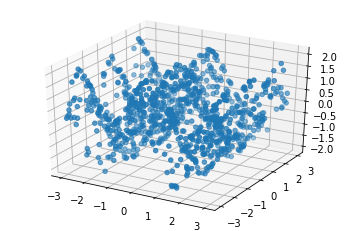

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), tf.keras.layers.Dense(1)])
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=tf.keras.losses.MSE)

In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               384       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [15]:
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.0129
Epoch 2/100
32/32 [==============================] - 0s 960us/step - loss: 0.9235
Epoch 3/100
32/32 [==============================] - 0s 998us/step - loss: 0.9048
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8886
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8409
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7962
Epoch 7/100
32/32 [==============================] - 0s 994us/step - loss: 0.7203
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6290
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6383
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5862
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5510
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.5045
Epoch 13/100
32/32 [===========

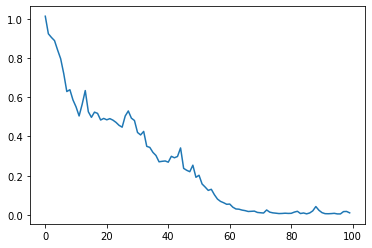

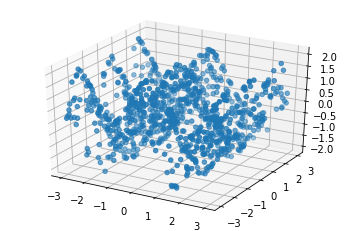

In [16]:
plt.plot(r.history['loss'], label='loss')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

In [20]:
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show()